# [LAB-06] 2. 데이터 분포 시각화 (1) - Boxplot, KDE, Histogram

## 데이터 분포와 시각화 종류

- 그래프 퀄 in 시각화 when drawing Boxplot: seaborn >>> plt

- 스케일링 유무의 근거는 상자 그림임

- KDE(Kernel Density Estimation, 커널 밀도 추정) function
  - by: sb.kdeplot() when '2) 그래프 그리기 step' 
  - α: 색 fill in 할 때 투명도 지정 파라미터
  - "hue = ''": 명목형 변수 중 분석할 변수 지정 파라미터 
    - 데이터 분석 할 땐 그래프의 꼬리 부분들 유심히 보기!
    - 여기가 신박한 결과 도출할 밭임!

$ 이건 궁서체로 쓰는 마크다운! $

**종모양**

- 양/음의 비대칭: ADsP 시험에도 나오는 개념임! 
  - 양의 비대칭: 꼬리가 오른쪽에 있는 케이스
    - 성격: 평균값 > 중앙값
  - 음의 비대칭: 꼬리 in 왼쪽 in 가로축
    - 성격: 평균값 < 중앙값  

## #01. 준비작업

### 1. 라이브러리 참조

In [ ]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np                          # 관측치 수 계산용 in Histogram

### 2. 그래프 초기화

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)      
font_prop = fm.FontProperties(fname = font_path)
font_name = font_prop.get_name()

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 16          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기

In [3]:
origin = load_data('employee_data_40')
origin.head()

[data] https://data.hossam.kr/data/lab06/employee_data_40.xlsx
[desc] 어느 기업의 직원 40명을 대상으로 성별과 결혼상태, 나이, 최종학력, 월수입을 조사한 가상의 데이터(인덱스, 메타데이터 없음)
[!] Cannot read metadata


,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70


## #02. Boxplot

### 방법 1) 연속성 데이터의 분포를 사분위수 기반으로 확인
list, ndarray, Series 등 모든 연속형 객체를 data 파라미터에 지정한다
orient로 방향을 설정할 수 있다
- v: vertical (세로, 기본값)
- h: horizontal (가로)

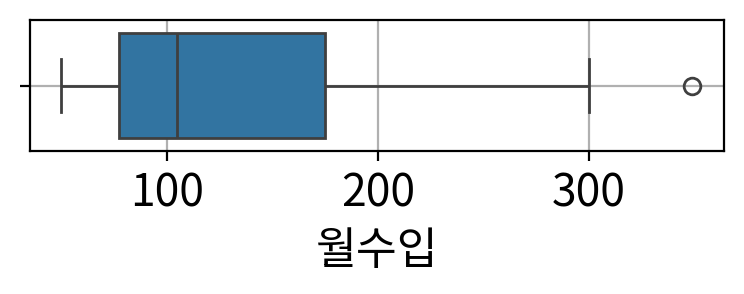

In [6]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 800
height_px = 350     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.boxplot(data = origin['월수입'], orient = 'h')

# 3) 그래프 꾸미기: 
ax.grid(True)

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 방법 2) 데이터프레임을 통한 상자그림
- data 파라미터에 데이터 프레임을 설정하고 y 파라미터에 표시하고자 하는 변수 이름을 문자열로 설정한다.

- x 파라미터에 설정할 경우 가로 상자 그림으로 표시됨

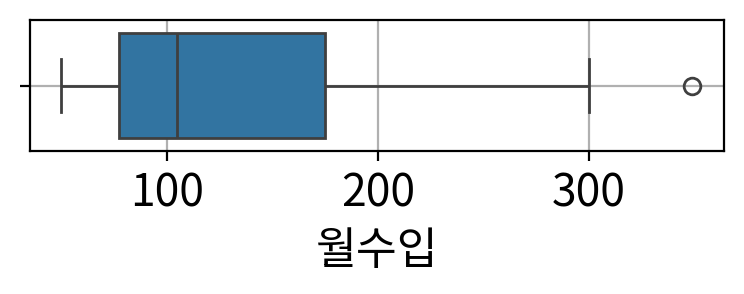

In [8]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 800
height_px = 350     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.boxplot(data = origin, x = '월수입')

# 3) 그래프 꾸미기: 
ax.grid(True)

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 방법 3) 복수 변수에 대한 처리
- 표시하고자 하는 변수를 필터링해서 data 파라미터에 설정한다

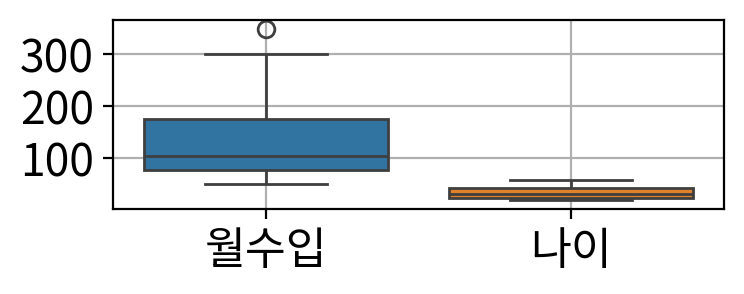

In [10]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 800
height_px = 350     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.boxplot(data = origin[['월수입', '나이']])

# 3) 그래프 꾸미기: 
ax.grid(True)

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


## #03. KDE Plot

- 연속형 데이터의 **분포를 부드러운 곡선 형태로 추정**하는 비모수적 방법
- 데이터의 전체적인 분포, 모양, 봉우리(peak), 꼬리(tail) 등을 확인하는 데 유용함

**비모수적 방법이란?**
- "데이터가 정규분포일 것이다"라는 가정 없음
- 대신 데이터 자체를 기반으로 분포의 모양 추정함
- 필요한 것은 데이터 구조와 패턴임! 파라미터(평균, 분산)은 필요없음!

### 1. 연속성 데이터 설정

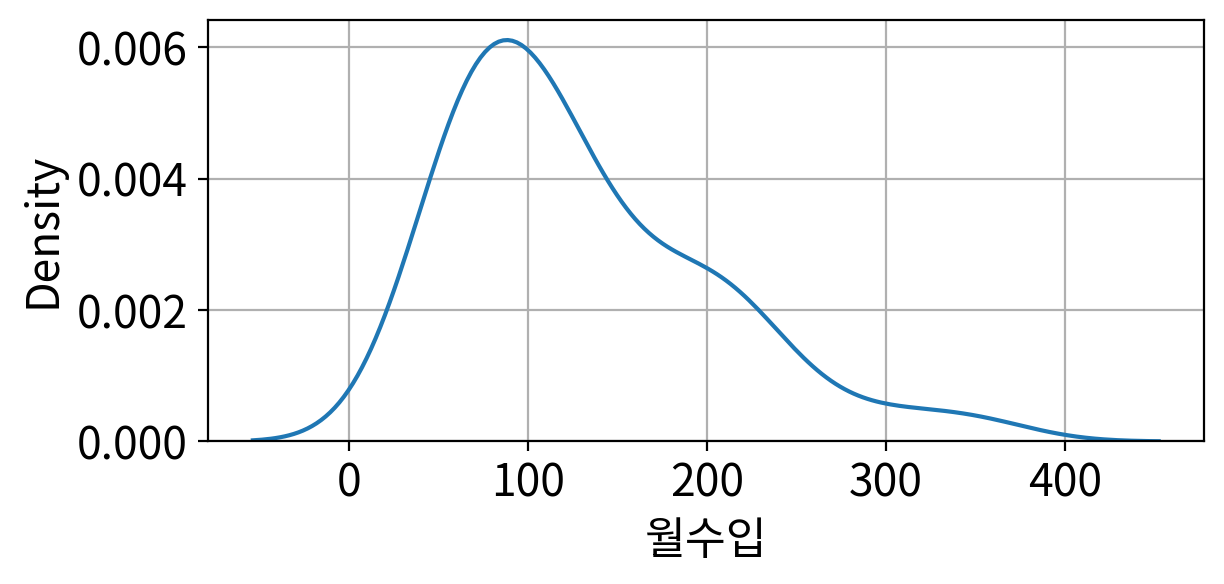

In [12]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 640     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.kdeplot(data = origin['월수입'])

# 3) 그래프 꾸미기: 
ax.grid(True)

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 2. 데이터 프레임 자체를 적용하기

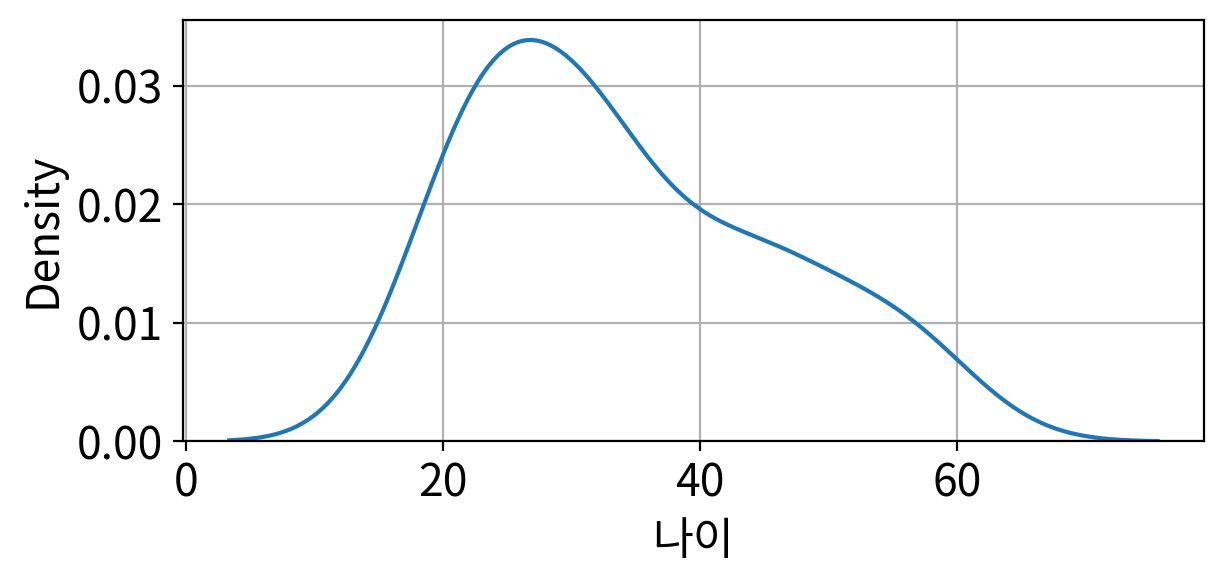

In [13]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 640     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.kdeplot(data = origin, x = '나이')

# 3) 그래프 꾸미기: 
ax.grid(True)

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 3. 다중 분포
데이터프레임을 'data' 파라미터에 적용하면서 x나 y 파라미터를 지정하지 않으면 모든 연속형 변수에 대한 커널밀도곡선이 표현됨!

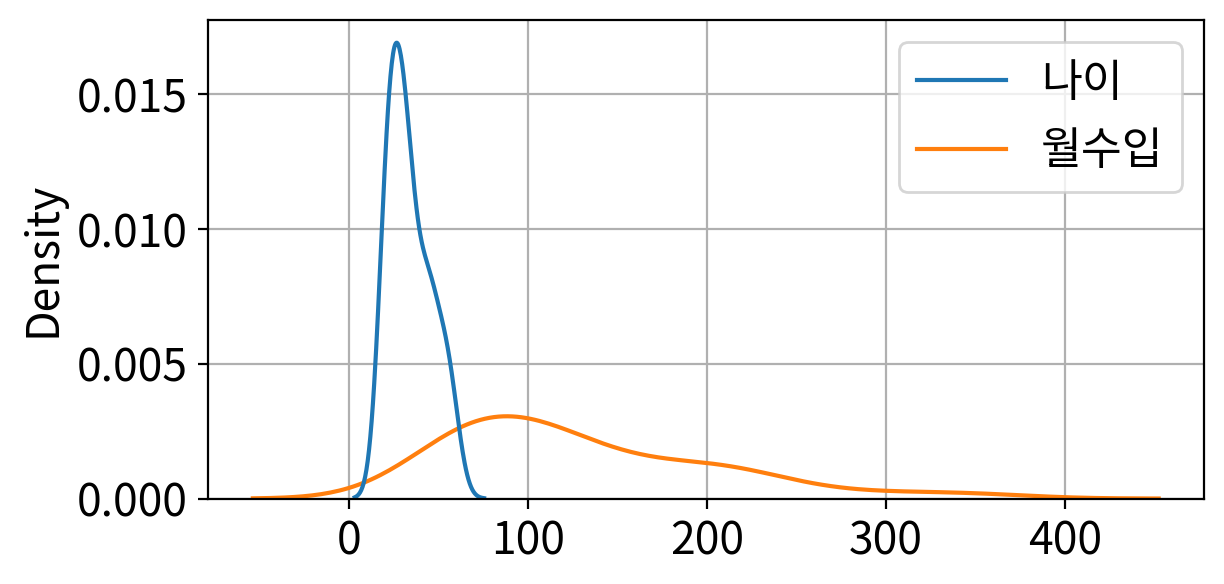

In [14]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 640     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.kdeplot(data = origin)

# 3) 그래프 꾸미기: 
ax.grid(True)

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 4. 색상 채우기
fill=True 파라미터를 설정하면 곡선 내부에 색상 채워짐
이때, alpha 파라미터를 0~1 사이의 값으로 설정하여 면의 투명도를 조절할 수 있다.
###### 0 = 투명, 1 = 불투명

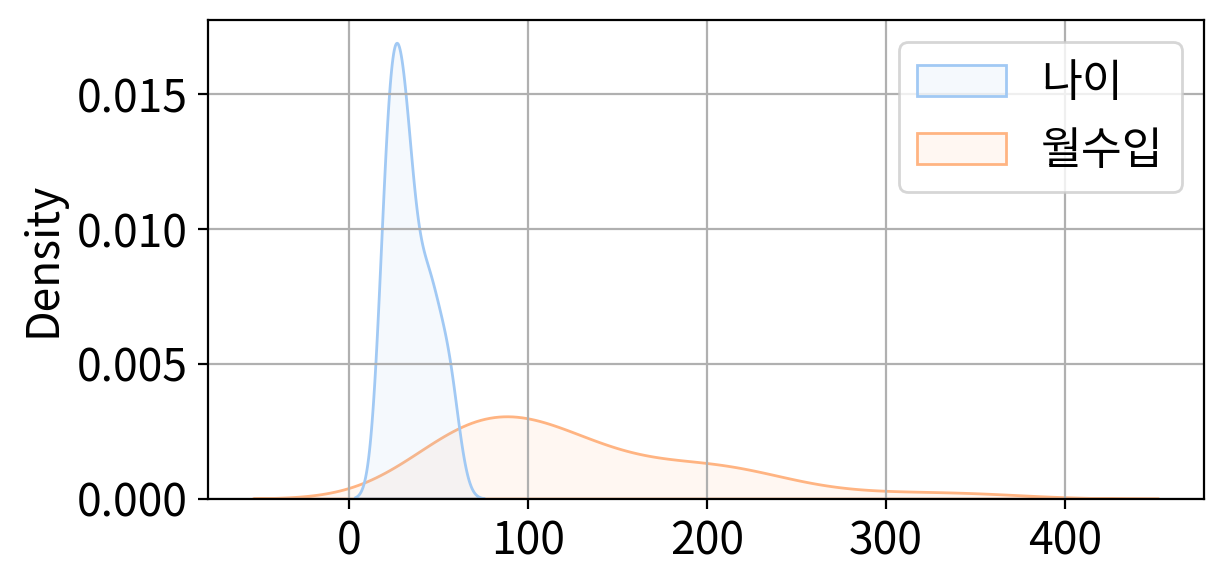

In [16]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 640     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.kdeplot(data = origin, fill = True, alpha = 0.1, palette = 'pastel')

# 3) 그래프 꾸미기: 
ax.grid(True)

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 5. 범주에 따른 구분
hue 파라미터에 명목형 변수의 이름 지정해주면 범주에 따라 그래프를 분기한다.

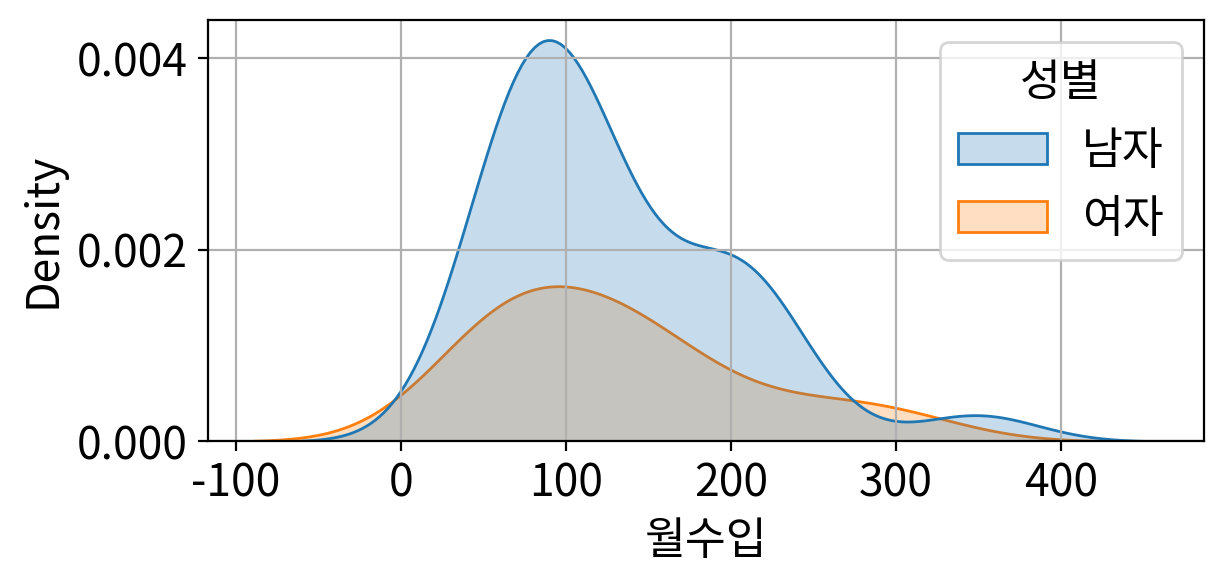

In [17]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 640     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.kdeplot(data = origin, fill = True, x = '월수입', hue = '성별')

# 3) 그래프 꾸미기: 
ax.grid(True)

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


## #04. Histogram
도수분포표를 시각화 한 그래프

### 방법 1) 구간 수 지정하기

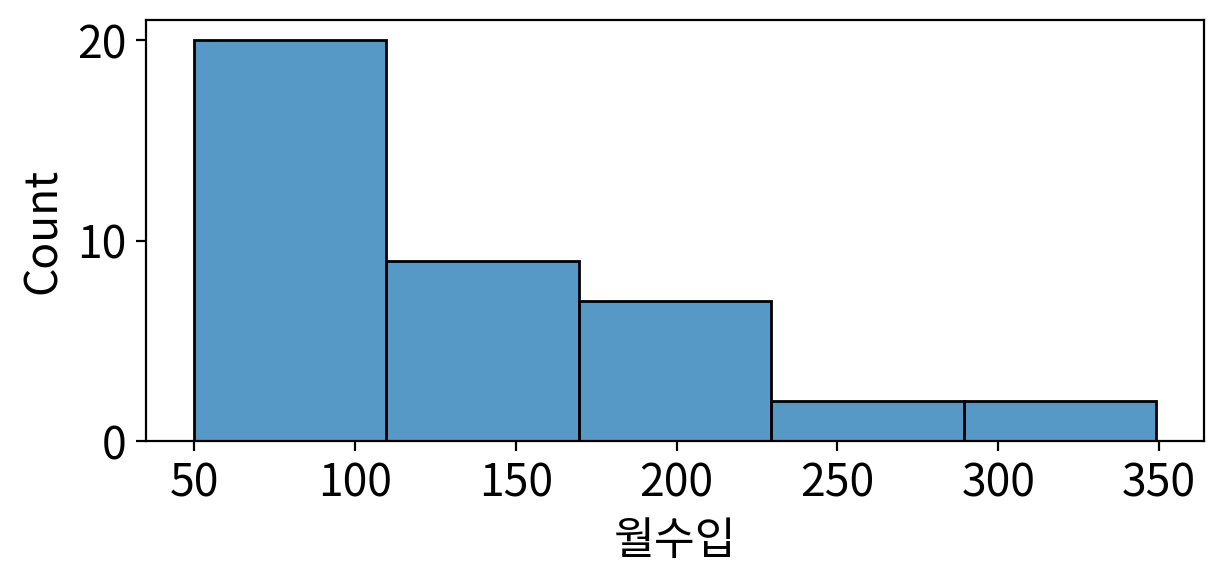

In [19]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 640     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.histplot(data = origin['월수입'], bins = 5)

# 3) 그래프 꾸미기: 
# ax.grid(True) -> 개 비추 히스토그램에선

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 방법 2) 구간 표시하기

In [21]:
hist, bins = np.histogram(origin['월수입'], bins = 5)
print(hist)
print(bins)

[20  9  7  2  2]
[ 50.  109.8 169.6 229.4 289.2 349. ]


In [22]:
bins = bins.round().astype('int')
bins

array([ 50, 110, 170, 229, 289, 349])

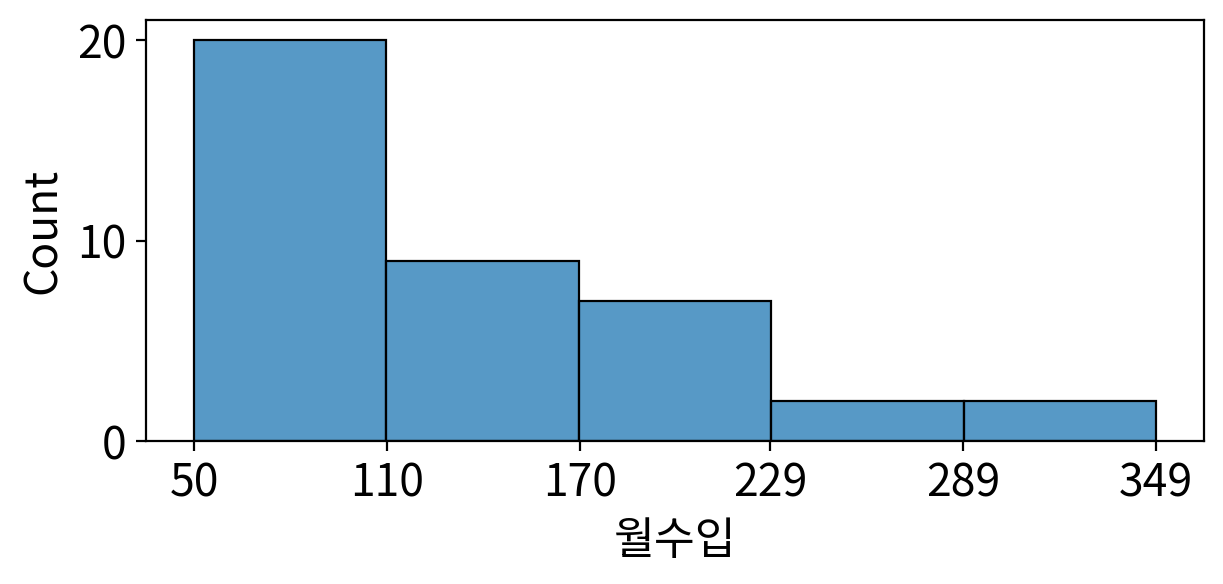

In [23]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 640     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.histplot(data = origin['월수입'], bins = 5, 
            edgecolor = '#000000', linewidth = 0.8)
ax.set_xticks(bins, bins)

# 3) 그래프 꾸미기: 
# ax.grid(True) -> 개 비추 히스토그램에선

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 방법 3) 구간 직접 설정하기
bins 파라미터에 구간을 의미하는 리스트를 지정한다

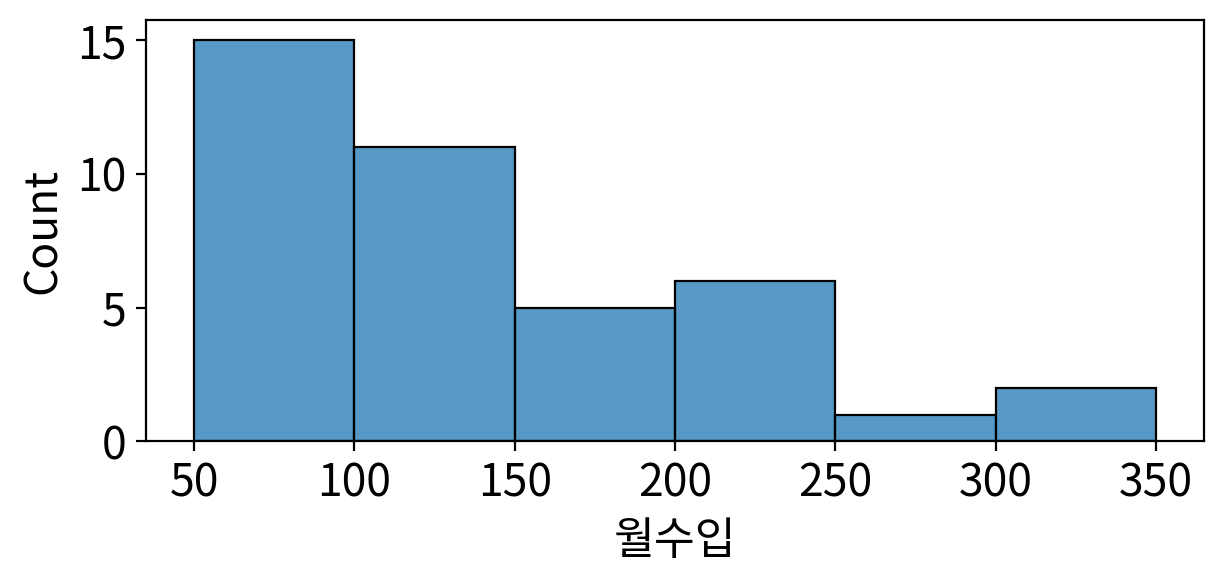

In [24]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 640     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.histplot(data = origin['월수입'], bins = [50 ,100, 150, 200, 250, 300, 350], 
            edgecolor = '#000000', linewidth = 0.8)

# 3) 그래프 꾸미기: 
# ax.grid(True) -> 개 비추 히스토그램에선

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 4) 범주에 따른 구분

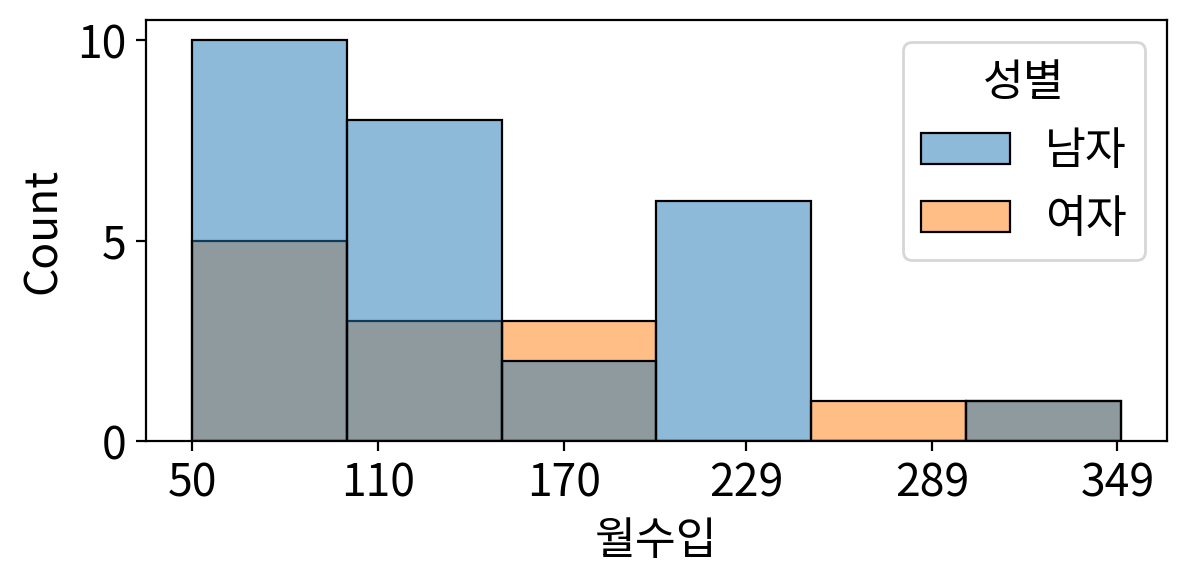

In [26]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 640     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.histplot(data = origin, x = '월수입', hue = '성별', 
            bins = [50 ,100, 150, 200, 250, 300, 350], 
            edgecolor = '#000000', linewidth = 0.8)
ax.set_xticks(bins, bins)

# 3) 그래프 꾸미기: 
# ax.grid(True) -> 개 비추 히스토그램에선

# 4) 출력
#plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 5) 히스토그램의 계급의 수와 간격의 크기
우리에게 주어지는 데이터는 종류도 다양하며 관측치의 개수도 다양함.
또한 그 데이터의 최솟값과 최댓값 또한 다양함

따라서 데이터가 주어졌을 때, 계급의 갯수와 계급의 간격을 설정하는 것에 어려움이 있을 수 있다.

**(1) 계급의 수 구하는 방법:**
- 스터지스의 공식(Stuges' formula)
    - 히스토그램의 계급의 수를 결정하는 공식
    - 계급 구간의 수 = 1 + 3.3logn
    - n: 관측치의 수
- **관측치의 수에 따른 계급 구간 수 표 활용**
  - 통계학에서 일반적으로 활용하는 표임